In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training and test data
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

print("Data loaded successfully.")
df_train.head()

Data loaded successfully.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# --- STAGE 2: DATA CLEANING & PREPROCESSING ---

# We will work on a copy to keep the original safe
df = df_train.copy()

# Handle missing values for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna('None')

# Handle missing values for numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# One-Hot Encode the categorical features
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.drop('Id', axis=1)

print("Data cleaning and encoding complete.")
print(f"Original columns: {len(df.columns)}, Encoded columns: {len(df_encoded.columns)}")

Data cleaning and encoding complete.
Original columns: 81, Encoded columns: 261


--- Top 10 Features Correlated with SalePrice ---
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

--- Visualizing Living Area vs. Sale Price ---


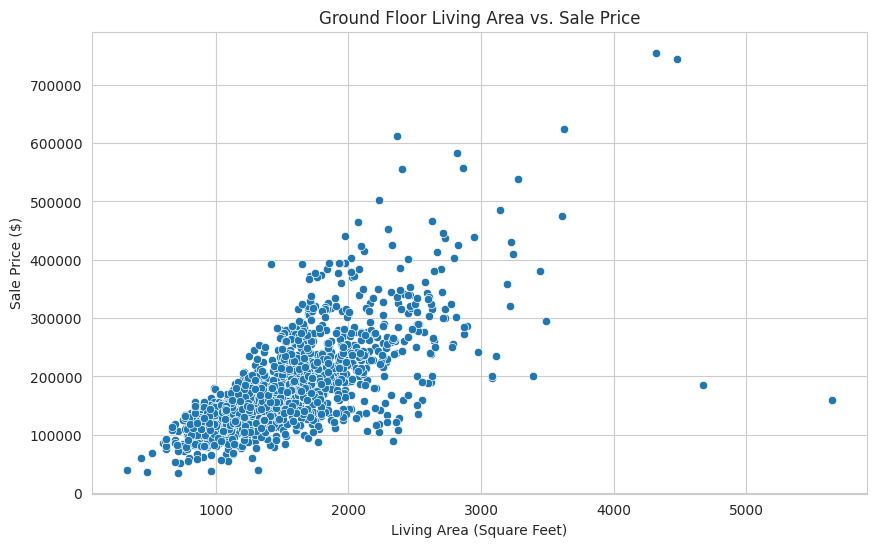

In [3]:
# --- STAGE 3: EXPLORATORY DATA ANALYSIS ---

sns.set_style('whitegrid')

# Top 10 features correlated with SalePrice
print("--- Top 10 Features Correlated with SalePrice ---")
correlation_matrix = df_encoded.corr()
top_10_corr = correlation_matrix['SalePrice'].sort_values(ascending=False).head(11)
print(top_10_corr)

# Visualize GrLivArea vs. SalePrice
print("\n--- Visualizing Living Area vs. Sale Price ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_encoded['GrLivArea'], y=df_encoded['SalePrice'])
plt.title('Ground Floor Living Area vs. Sale Price')
plt.xlabel('Living Area (Square Feet)')
plt.ylabel('Sale Price ($)')
plt.show()

In [4]:
# --- STAGE 4: MODEL TRAINING & EVALUATION ---

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define features (X) and target (y)
X = df_encoded.drop('SalePrice', axis=1)
y = df_encoded['SalePrice']

# Split data for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForest model
print("--- Training the model... ---")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("Model training complete.")

# Evaluate the model
print("\n--- Evaluating the model... ---")
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

--- Training the model... ---
Model training complete.

--- Evaluating the model... ---
Mean Absolute Error (MAE): $17,701.05
R-squared (R²) Score: 0.89


--- Visualizing Predictions vs. Actual Prices ---


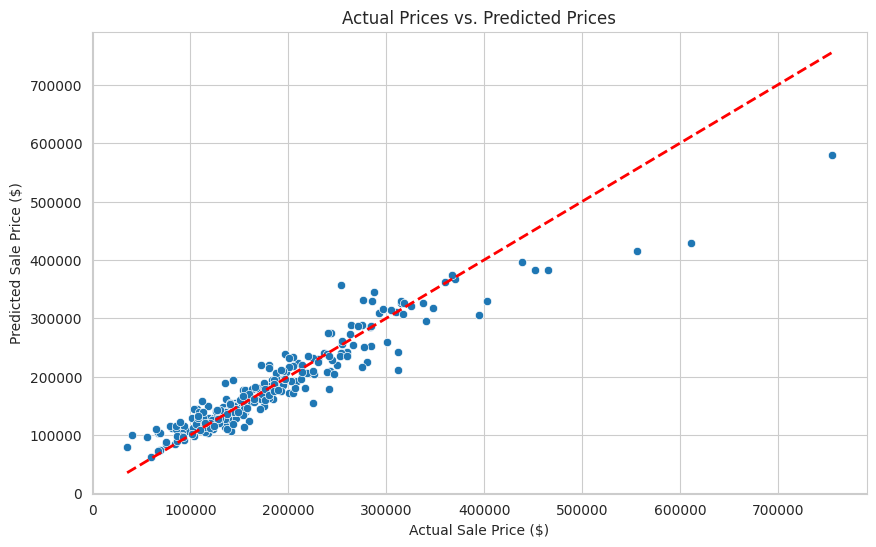


--- Top 10 Most Important Features ---


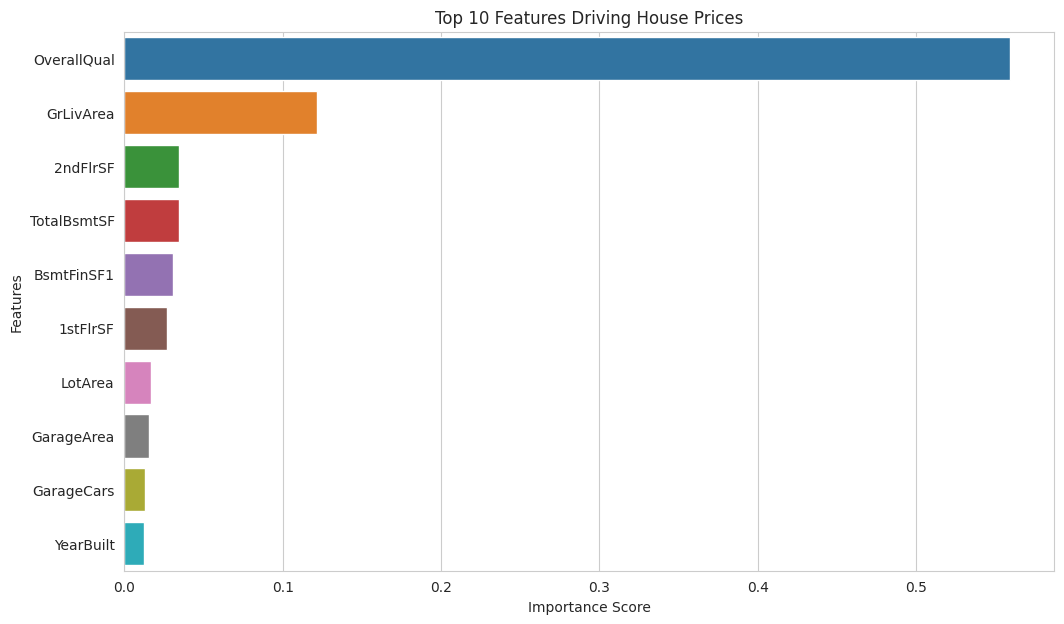

In [5]:
# 1. Visualize Predictions vs. Actual Prices
print("--- Visualizing Predictions vs. Actual Prices ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Adds a red line showing a "perfect" prediction
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.show()

# 2. Visualize Feature Importance
print("\n--- Top 10 Most Important Features ---")
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Top 10 Features Driving House Prices')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()